<div style="display: flex; background-color: RGB(106,90,205);">
<h1 style="margin: auto; padding: 30px; color: RGB(255,255,255);">PROJET 6 - Détectez des faux-billets</h1>
</div>

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Objectif : Création d'un programme capable d'effectuer une prédiction sur un billet</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Importation des librairies et des fonctions utiles</h3>
</div>

In [1]:
# import des fonctions utiles
from functions import*

# import des librairies utiles 
import scipy.stats as st
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing, decomposition, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sb

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Découverte des données</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Importation du fichier relatif aux billets</h3>
</div>

In [2]:
# chargement de la table 'billets'
billets = pd.read_csv("billets.csv")

# On observe
billets.head()

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche des valeurs manquantes</h3>
</div>

In [3]:
billets.isnull().sum()

is_genuine      0
length          0
height_left     0
height_right    0
margin_low      0
margin_up       0
diagonal        0
dtype: int64

> La table ne contient pas de valeur manquante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche de doublons</h3>
</div>

In [4]:
# On observe les dimensions de la table avant traitement
print(billets.shape)

(170, 7)


In [5]:
# On traite
billets.drop_duplicates(keep='first',inplace=True)
len(billets)

170

> La table ne contient pas de doublon

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Recherche de valeurs aberrantes sur la seule variable qualitative</h3>
</div>

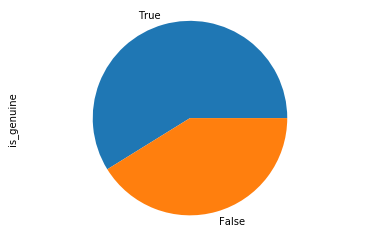

In [6]:
# On affiche un graphique avec les différentes valeurs 
billets["is_genuine"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 

# On sauvegared le graphique
plt.savefig('is_genuine')
plt.show() 

> Cette variable ne contient pas de valeur aberrante

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Mission 0 : Analyse statistique</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Quelques analyses univariées</h3>
</div>

In [7]:
# On calcule quelques indicateurs de tendance centrale et de dispersion sur la variable 'length'
billets["length"].describe()

count    170.000000
mean     171.940588
std        0.305768
min      171.040000
25%      171.730000
50%      171.945000
75%      172.137500
max      173.010000
Name: length, dtype: float64

> Cette variable ne contient pas de valeur aberrante

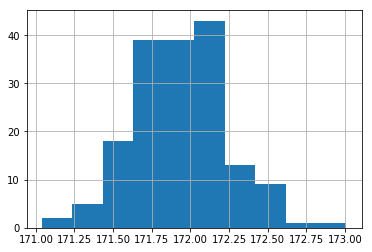

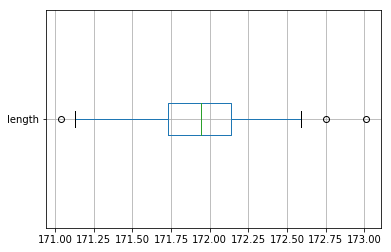

In [8]:
# Représentation graphique de cette variable à l'aide d'un histogramme 
billets["length"].hist() 

# On sauvegarde le graphique
plt.savefig('hist_length')
plt.show() 

# Représentation graphique de cette variable à l'aide d'un d'un boxplot
billets.boxplot(column="length", vert=False)

# On sauvegarde le graphique
plt.savefig('boxplot_length')
plt.show()

> On remarque la présence de 3 outliers (cf faux-billets)

In [9]:
# On calcule quelques indicateurs de tendance centrale et de dispersion sur la variable 'height_left'
billets["height_left"].describe()

count    170.000000
mean     104.066353
std        0.298185
min      103.230000
25%      103.842500
50%      104.055000
75%      104.287500
max      104.860000
Name: height_left, dtype: float64

> Cette variable ne contient pas de valeur aberrante

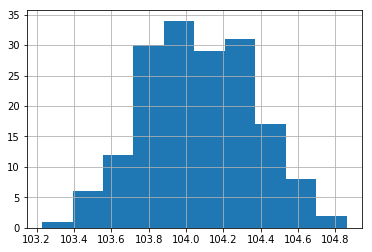

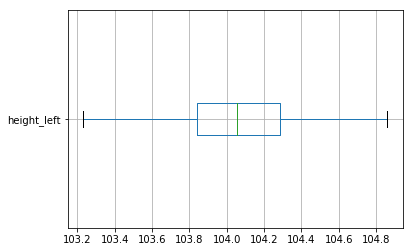

In [10]:
# Représentation graphique de cette variable à l'aide d'un histogramme
billets["height_left"].hist() 

# On sauvegarde le graphqiue
plt.savefig('hist_height_left')
plt.show() 

# Représentation graphique de cette variable à l'aide d'un boxplot
billets.boxplot(column="height_left", vert=False)

# On sauvegarde le graphique
plt.savefig('boxplot_height_left')
plt.show()

In [11]:
# On calcule quelques indicateurs de tendance centrale et de dispersion sur la variable 'height_right'
billets["height_right"].describe()

count    170.000000
mean     103.928118
std        0.330980
min      103.140000
25%      103.690000
50%      103.950000
75%      104.170000
max      104.950000
Name: height_right, dtype: float64

> Cette variable ne contient pas de valeur aberrante

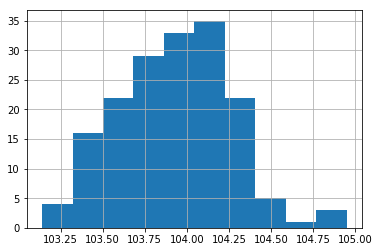

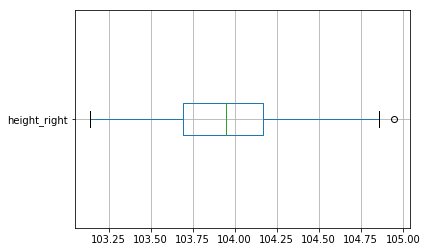

In [12]:
# Représentation graphique de cette variable à l'aide d'un histogramme
billets["height_right"].hist() 

# On sauvegarde le graphique
plt.savefig('hist_height_right')
plt.show() 

# Représentation graphique de cette variable à l'aide d'un boxplot
billets.boxplot(column="height_right", vert=False)

# On sauvegarde la graphique
plt.savefig('boxplot_height_right')
plt.show()

> On remarque la présence d'1 outliers (cf faux billets)

In [13]:
# On calcule quelques indicateurs de tendance centrale et de dispersion sur la variable 'margin_low'
billets["margin_low"].describe()

count    170.000000
mean       4.612118
std        0.702103
min        3.540000
25%        4.050000
50%        4.450000
75%        5.127500
max        6.280000
Name: margin_low, dtype: float64

> Cette variable ne contient pas de valeur aberrante

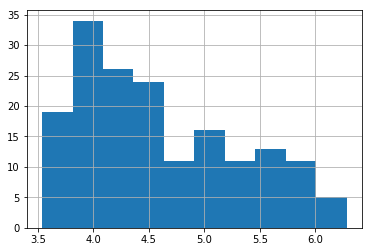

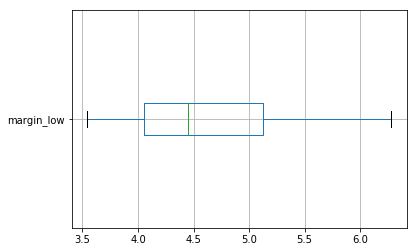

In [14]:
# Représentation graphique de cette variable à l'aide d'un histogramme 
billets["margin_low"].hist() 

# On sauvegarde le graphique
plt.savefig('hist_margin_low')
plt.show()

# Représentation graphique de cette variable à l'aide d'un boxplot
billets.boxplot(column="margin_low", vert=False)

# On sauvegarde le graphique
plt.savefig('boxplot_margin_low')
plt.show()

In [15]:
# On calcule quelques indicateurs de tendance centrale et de dispersion sur la variable 'margin_up'
billets["margin_up"].describe()

count    170.000000
mean       3.170412
std        0.236361
min        2.270000
25%        3.012500
50%        3.170000
75%        3.330000
max        3.680000
Name: margin_up, dtype: float64

> Cette variable ne contient pas de valeur aberrante

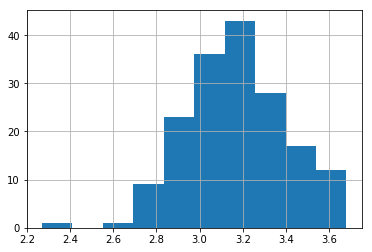

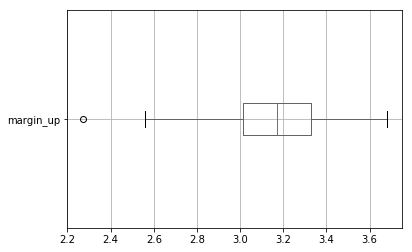

In [16]:
# Représentation graphique de cette variable à l'aide d'un histogramme
billets["margin_up"].hist() 

# On sauvegarde le graphqiue 
plt.savefig('hist_margin_up')
plt.show() 

# Représentation graphique de cette variable à l'aide d'un boxplot
billets.boxplot(column="margin_up", vert=False)

# On sauvegarde le graphique 
plt.savefig('boxplot_margin_up')
plt.show()

> On remarque la présence d'1 outlier (cf faux-billet)

In [17]:
# On calcule quelques indicateurs de tendance centrale et de dispersion sur la variable 'diagonal'
billets["diagonal"].describe()

count    170.000000
mean     112.570412
std        0.924448
min      109.970000
25%      111.855000
50%      112.845000
75%      113.287500
max      113.980000
Name: diagonal, dtype: float64

> Cette variable ne contient pas de valeur aberrante

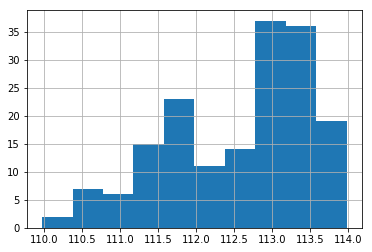

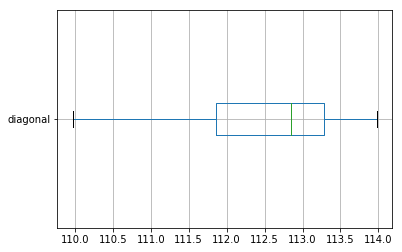

In [18]:
# Représentation graphique de cette variable à l'aide d'un histogramme
billets["diagonal"].hist()

# On sauvegarde le graphique 
plt.savefig('hist_diagonal')
plt.show() 

# Représentation graphique de cette variable à l'aide d'un boxplot
billets.boxplot(column="diagonal", vert=False)

# On sauvegarde le graphique
plt.savefig('boxplot_diagonal')
plt.show()

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Quelques analyses bivariées</h3>
</div>

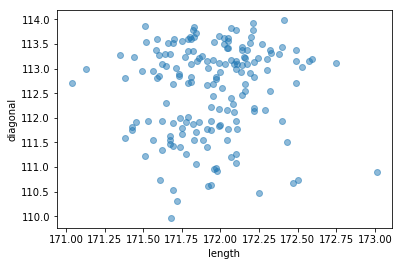

In [19]:
# Affichage du diagramme de dispersion avec les variables 'length' et 'diagonal'
plt.plot(billets["length"],billets["diagonal"],'o',alpha=0.5)
plt.xlabel("length")
plt.ylabel("diagonal")

# On sauvegarde le graphique
plt.savefig('scatter_length_diagonal')
plt.show()

In [20]:
# Calcul du coefficient de corrélation de Pearson
st.pearsonr(billets["length"],billets["diagonal"])[0]

0.08029518555722717

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Interprétation</h3>
</div>

> Le coefficient de corrélation de Pearson ne détecte les relations que lorsqu'elles sont linéaires, c'est-à-dire 
 lorsque les points sont plutôt bien alignés sur une ligne droite. Ce qui n'est pas le cas ici.

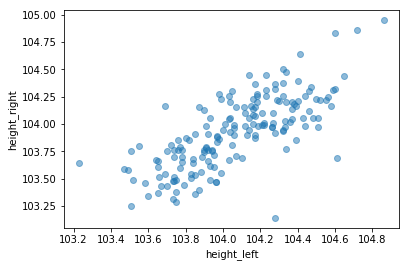

In [21]:
# Affichage du diagramme de dispersion avec les variables 'height_left' et 'height_right'
plt.plot(billets["height_left"],billets["height_right"],'o',alpha=0.5)
plt.xlabel("height_left")
plt.ylabel("height_right")

# On sauvegarde le graphique
plt.savefig('scatter_height_left_height_right')
plt.show()

In [22]:
# Calcul du coefficient de corrélation de Pearson
st.pearsonr(billets["height_left"],billets["height_right"])[0]

0.7343902682297874

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Interprétation</h3>
</div>

> Au regard du résultat il y a une corrélation linéaire et statistique mais il faudrait aller plus loin pour voir si il y a un lien de cause à effet dans la réalité, alors cette corrélation serait concrète 

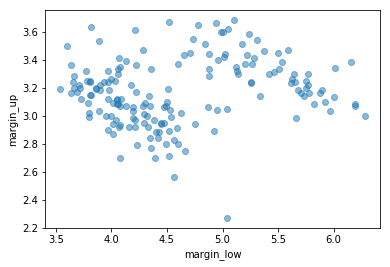

In [23]:
# Affichage du diagramme de dispersion avec les variables 'margin_low' et 'margin_up'
plt.plot(billets["margin_low"],billets["margin_up"],'o',alpha=0.5)
plt.xlabel("margin_low")
plt.ylabel("margin_up")

# On sauvegarde le graphique
plt.savefig('scatter_margin_low_margin_up')
plt.show()

In [24]:
# Calcul du coefficient de corrélation de Pearson
st.pearsonr(billets["margin_low"],billets["margin_up"])[0]

0.17111283050073073

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Interprétation</h3>
</div>

> Le coefficient de corrélation de Pearson ne détecte les relations que lorsqu'elles sont linéaires, c'est-à-dire 
lorsque les points sont plutôt bien alignés sur une ligne droite. Ce qui n'est pas le cas ici.

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Mission 1 : Analyse en Composantes Principales de l'échantillon</h2>
</div>

> La variable 'is_genuine' est utilisée comme variable illustrative

In [25]:
# On modifie en index la variable 'is_genuine'
billets.set_index('is_genuine', inplace=True, drop=True)

# On observe
billets.head()

,length,height_left,height_right,margin_low,margin_up,diagonal
is_genuine,,,,,,
True,171.81,104.86,104.95,4.52,2.89,112.83
True,171.67,103.74,103.70,4.01,2.87,113.29
True,171.83,103.76,103.76,4.40,2.88,113.84
True,171.80,103.78,103.65,3.73,3.12,113.63
True,172.05,103.70,103.75,5.04,2.27,113.55


In [26]:
# On convertit les données de 'billets' en un objet de type array Numpy
X = billets.values

# On observe
X

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.67, 103.74, 103.7 ,   4.01,   2.87, 113.29],
       [171.83, 103.76, 103.76,   4.4 ,   2.88, 113.84],
       ...,
       [172.47, 104.27, 104.1 ,   4.88,   3.33, 110.68],
       [171.82, 103.97, 103.88,   4.73,   3.55, 111.87],
       [171.96, 104.  , 103.95,   5.63,   3.26, 110.96]])

In [27]:
# On affecte les valeurs de l'index à names
names = billets.index

# On affecte les colonnes à features
features = billets.columns

> On centre et on réduite à l'aide de la librairie scikit-learn

In [28]:
# Centrage et Réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# On observe
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [29]:
# On détermine le nombre des composantes principales
n_comp = 4

> On calcule les composantes principales à l'aide de la librairie scikit-leran

In [30]:
# Calcul des composantes principales 
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Analayse de l'éboulis des valeurs propres</h3>
</div>

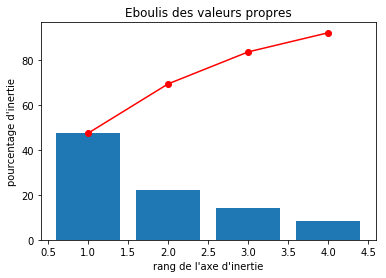

In [31]:
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')

# On détermine les légendes
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

# On sauvegarde le graphique
plt.savefig('e')

> Les 2 premières composantes principales représentent plus de 70% de l'inertie<br/>
><br/>
> L'étude sur le premier plan factoriel sera donc pertinente

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Représentation des variables par le cercle des corrélations</h3>
</div>

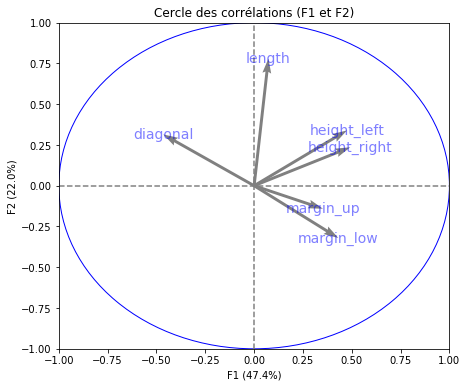

In [32]:
# On crée la fonction
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    
# On affiche les 3 premiers plans factoriels, donc les 6 premières composantes    
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

# Initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

# On détermine des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

# Affichage des flèches
# s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            
# (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
# Affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
# Affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

# Définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
# Affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# Nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))

# On affiche le graphique
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# On sauvegarde le graphique
plt.savefig('cercle_correlations')
plt.show()

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Représentation des individus sur le 1er plan factoriel</h3>
</div>

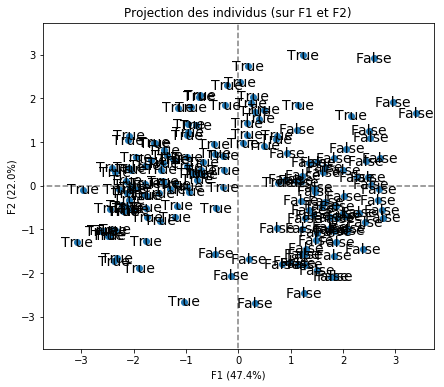

In [33]:
# On crée la fonction
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
            
# Initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
# Affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

# Affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
# Détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
# Affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

# Nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

# Nom du titre
            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))

# On sauvegarde le graphique
plt.savefig('projection_individus')
plt.show()

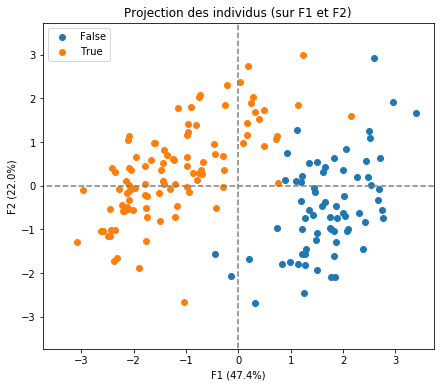

In [34]:
# Affichage en fonction des valeurs de l'index
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],  illustrative_var=np.array(names))

# On sauvegarde le graphique
plt.savefig('projection_individus_colores')
plt.show()

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Analyse de la qualité de représentation et de la contribution des individus</h3>
</div>

> La variable 'diagonal' ainsi que le couple de variables 'margin_up', 'margin_low' semblent permettre de déterminer les vrais billets des faux<br/>
><br/>
> En effet sur 1 majorité de billets : 
- vrai-billet : la diagonale est plus élevée et les marges sont plus faibles 
- faux-billet : c'est l'inverse 
- 2-3 faux billets se promènent

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Mission 2 : Clustering hiérarchique</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Création d'un dendrogramme à l'aide d'un algorithme de classification</h3>
</div>

> En statistiques, et plus particulièrement en classification hiérarchique, la méthode de Ward est un algorithme permettant de regrouper deux classes d'une partition pour obtenir une partition plus agrégée

In [35]:
# Clustering hiérarchique à l'aide de la librairie scipy
Z = linkage(X_scaled, 'ward')

# On observe
Z

array([[ 58.        ,  83.        ,   0.41912015,   2.        ],
       [ 59.        ,  64.        ,   0.44725813,   2.        ],
       [ 85.        ,  98.        ,   0.46825035,   2.        ],
       [120.        , 140.        ,   0.47114187,   2.        ],
       [  2.        ,  31.        ,   0.4843012 ,   2.        ],
       [ 42.        ,  67.        ,   0.48823867,   2.        ],
       [  7.        ,  93.        ,   0.49395901,   2.        ],
       [ 14.        ,  74.        ,   0.52489335,   2.        ],
       [111.        , 143.        ,   0.55752737,   2.        ],
       [107.        , 125.        ,   0.56201253,   2.        ],
       [ 13.        ,  47.        ,   0.56597629,   2.        ],
       [116.        , 117.        ,   0.60107793,   2.        ],
       [104.        , 163.        ,   0.62450673,   2.        ],
       [141.        , 152.        ,   0.63333457,   2.        ],
       [ 50.        ,  99.        ,   0.64174701,   2.        ],
       [ 61.        ,  62

> Création du dendrogramme à l'aide de la librairie scipy

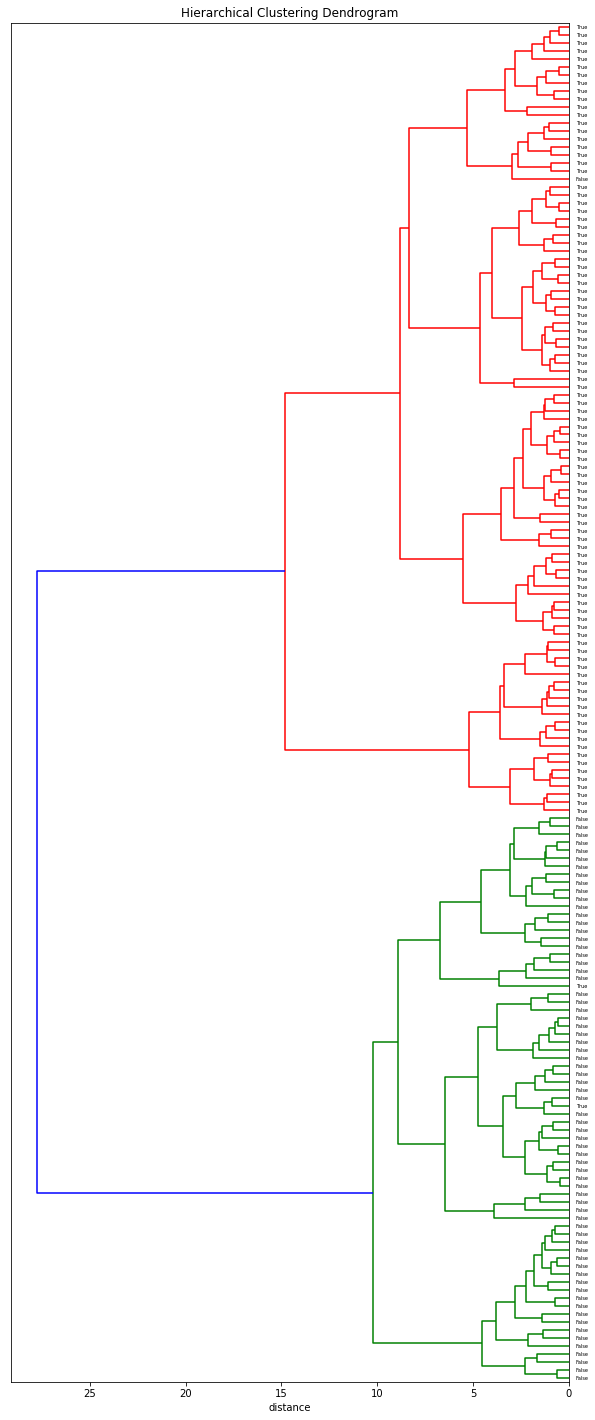

In [36]:
# Affichage du dendrogramme
plt.figure(figsize=(10,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')

# color_threshold=20 détermine la distance donc le nb de clusters
dendrogram(Z,labels = names,orientation = "left",color_threshold=20)

# On sauvegarde le graphique
plt.savefig('dendrogram')
plt.show()

In [37]:
# Découpage du dendrogramme en 2 clusters
n_comp = 2
clusters = fcluster(Z, n_comp, criterion='maxclust')

In [38]:
# clusters est ajouté en nouvelle variable à la table
billets["clusters"] = clusters
billets.head()

,length,height_left,height_right,margin_low,margin_up,diagonal,clusters
is_genuine,,,,,,,
True,171.81,104.86,104.95,4.52,2.89,112.83,1
True,171.67,103.74,103.70,4.01,2.87,113.29,2
True,171.83,103.76,103.76,4.40,2.88,113.84,2
True,171.80,103.78,103.65,3.73,3.12,113.63,2
True,172.05,103.70,103.75,5.04,2.27,113.55,2


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Interprétation</h3>
</div>

> Comme on pouvait s'y attendre le clustering hiérarchique nous ressort deux groupes 

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Visualisation de la partition obtenue dans le premier plan factoriel de l'ACP</h3>
</div>

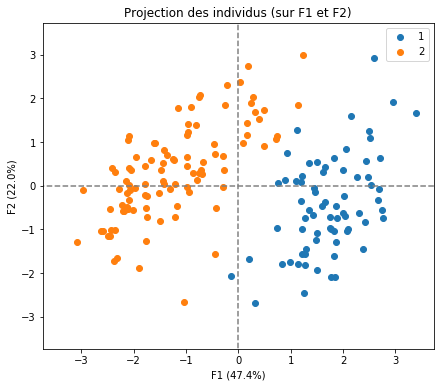

In [39]:
# On projette les individus en fonction du cluster
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=clusters)

# On sauvegarde le graphqiue 
plt.savefig('projection_clusters')
plt.show()

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Interprétation</h3>
</div>

In [40]:
# tableau de confusion 
tc = pd.crosstab(names,clusters)
print(tc)

col_0   1   2
row_0        
False  69   1
True    2  98


> Le clustering donne un résultat exact à 3 billets près 

In [41]:
# Affichage des caractéristiques des différents clusters
clusters_features = billets.groupby(by='clusters').mean()
clusters_features

,length,height_left,height_right,margin_low,margin_up,diagonal
clusters,,,,,,
1,171.894085,104.243662,104.160986,5.248592,3.333521,111.660423
2,171.973939,103.939192,103.761111,4.155657,3.053434,113.223030


> Les caractéristiques des différents clusters semblent valider nos observations antérieures

<div style="background-color: RGB(106,90,205);">
<h2 style="margin: auto; padding: 20px; color:RGB(255,255,255);">Mission 3 : Création du programme</h2>
</div>

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Modélisation des données à l'aide d'une régression logistique</h3>
</div>

> Objectif : Prédire/expliquer la variable 'is_genuine' à partir des caractéristiques des billets de notre échantillon ('length', 'height_left', etc.) :
- y : variable cible (is_genuine)
- X1, X2, ... : variables explicatives
- f(.) une fonction qui essaie d'établir la relation y = f(X1, X2, ...)
- f(.) doit être "aussi précise que possible" ...

In [42]:
# Re-chargement de la table 'billets'
billets = pd.read_csv("billets.csv")
billets.head()

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">On vérifie l'indépendance entre les variables explicatives</h3>
</div>

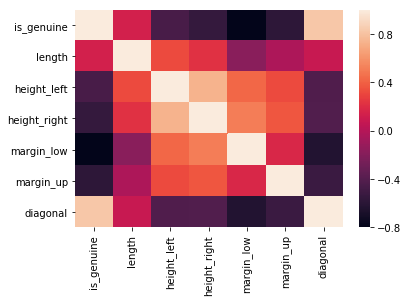

In [43]:
# On affiche un tableau de chaleur
sb.heatmap(billets.corr())

# On sauvegarde le graphique
plt.savefig('heatmap')
plt.show()

> Nous pouvons remarquer une corrélation naturelle entre certaines variables, ce qui ne pose pas de problème en cas de régression logistique<br/>
><br/>
> Nous savons déjà que notre échantillon ne contient pas de valeur manquante<br/>
><br/>
> Nous savons également que notre variable 'is_genuine' est une variable qualitative

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">On vérifie que la taille de notre échantillon est suffisante</h3>
</div>

In [44]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
is_genuine      170 non-null bool
length          170 non-null float64
height_left     170 non-null float64
height_right    170 non-null float64
margin_low      170 non-null float64
margin_up       170 non-null float64
diagonal        170 non-null float64
dtypes: bool(1), float64(6)
memory usage: 8.2 KB


> La taille de notre échantillon est suffisante

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Subdivision en échantillons d'apprentissage et de test</h3>
</div>

In [45]:
# On convertit les données de 'billets' en un objet de type array Numpy
data = billets.values

# On observe
data

array([[True, 171.81, 104.86, ..., 4.52, 2.89, 112.83],
       [True, 171.67, 103.74, ..., 4.01, 2.87, 113.29],
       [True, 171.83, 103.76, ..., 4.4, 2.88, 113.84],
       ...,
       [False, 172.47, 104.27, ..., 4.88, 3.33, 110.68],
       [False, 171.82, 103.97, ..., 4.73, 3.55, 111.87],
       [False, 171.96, 104.0, ..., 5.63, 3.26, 110.96]], dtype=object)

In [46]:
# X matrice des var. explicatives
X = billets.iloc[:,1:7]

# On observe
X.head()

,length,height_left,height_right,margin_low,margin_up,diagonal
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55


In [47]:
# y vecteur de la var. à prédire
y = billets.iloc[:,0]

# On observe
y.head()

0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool

In [48]:
# subdivision des données - éch.test = 80; éch.app = 170 - éch.test = 90
X_app,X_test,y_app,y_test=model_selection.train_test_split(X,y,test_size=80,random_state=0)

# On observe
print(X_app.shape,X_test.shape,y_app.shape,y_test.shape)

(90, 6) (80, 6) (90,) (80,)


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Construction du modèle sur l'échantillon d'apprentissage</h3>
</div>

> Utilisation de la librairie scikit-learn

In [49]:
# Création d'une instance de la classe
lr = LogisticRegression()

In [50]:
# Exécution de l'instance sur les données d'apprentissage, c-à-d construction du modèle prédictif
modele = lr.fit(X_app,y_app)

In [51]:
# Affichage des coefficients
print(modele.coef_,modele.intercept_)

[[-0.3084693  -0.538903   -0.82994621 -2.38901496 -1.15540353  1.87223403]] [-0.00274145]


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Prédiction et évaluation sur l'échantillon test</h3>
</div>

> Utilisation de la librairie scikit-learn

In [52]:
# Prédiction sur l'échantillon test
y_pred = modele.predict(X_test)

In [53]:
# Matrice de confusion : confrontation entre Y obs. sur l'éch.test et la prédiction
cm = metrics.confusion_matrix(y_test,y_pred)

# On observe
print(cm)

[[35  0]
 [ 0 45]]


In [54]:
# Taux de succès
acc = metrics.accuracy_score(y_test,y_pred)

# On observe
print(acc)

1.0


In [55]:
# Taux d'erreur
err = 1.0 - acc

# On observe
print(err)

0.0


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Construction de notre propre mesure de performance</h3>
</div>

In [56]:
# On crée la fonction
def specificity(y,y_hat):
# matrice de confusion - un objet numpy.ndarry
    mc = metrics.confusion_matrix(y,y_hat)
# "negative" est sur l'indice 0 dans la matrice
    import numpy
    res = mc[0,0]/numpy.sum(mc[0,:])
# retour
    return res

In [57]:
# On la rend utilisable - transformation en objet scorer
specificite = metrics.make_scorer(specificity,greater_is_better=True)

In [58]:
# Utilisation de l'objet scorer
# Remarque : modele est le modèle élaboré sur l'éch. d'apprentissage
sp = specificite(modele,X_test,y_test)

# On observe
print(sp)

1.0


<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">On applique notre programme au fichier d'exemple</h3>
</div>

In [59]:
# Importation du fichier d'exemple 
df_pred = pd.read_csv("exemple.csv")

# On observe
df_pred.head()

,length,height_left,height_right,margin_low,margin_up,diagonal,id
0,171.76,104.01,103.54,5.21,3.30,111.42,B_1
1,171.87,104.17,104.13,6.00,3.31,112.09,B_2
2,172.00,104.58,104.29,4.99,3.39,111.57,B_3
3,172.49,104.55,104.34,4.44,3.03,113.20,B_4
4,171.65,103.63,103.56,3.77,3.16,113.33,B_5


In [60]:
# Sélection des variables explicatives
X = df_pred.iloc[:,0:6]

# On observe
X.head()

,length,height_left,height_right,margin_low,margin_up,diagonal
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [61]:
# On fait tourner le programme
df_pred['is_genuine'] = lr.predict(X)

# On observe
df_pred

,length,height_left,height_right,margin_low,margin_up,diagonal,id,is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,B_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,B_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,B_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,B_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,B_5,True


In [62]:
# On récupère les probabilité dans un tabelau numpy
proba = lr.predict_proba(X)

# On observe
proba

array([[0.9324309 , 0.0675691 ],
       [0.97974613, 0.02025387],
       [0.94911101, 0.05088899],
       [0.15719008, 0.84280992],
       [0.00836435, 0.99163565]])

<div style="border: 1px solid RGB(106,90,205);">
<h3 style="margin: auto; padding: 20px; color: RGB(106,90,205);">Affichage des billets dans le 1er plan factoriel</h3>
</div>

In [63]:
# la variable "is_genuine" est prise en index
df_pred.set_index('is_genuine', inplace=True, drop=True)

# On observe
df_pred.head()

,length,height_left,height_right,margin_low,margin_up,diagonal,id
is_genuine,,,,,,,
False,171.76,104.01,103.54,5.21,3.30,111.42,B_1
False,171.87,104.17,104.13,6.00,3.31,112.09,B_2
False,172.00,104.58,104.29,4.99,3.39,111.57,B_3
True,172.49,104.55,104.34,4.44,3.03,113.20,B_4
True,171.65,103.63,103.56,3.77,3.16,113.33,B_5


In [64]:
# On affecte les valeurs de l'index à names
names = df_pred.index

# On affecteles colonnes à deatures
features = df_pred.columns

In [65]:
# centrage et réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

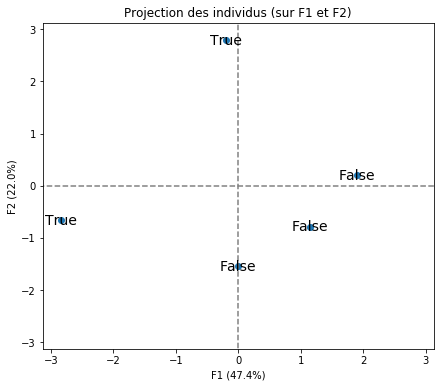

In [66]:
# On projette les individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))

# On sauvegarde le garphique
plt.savefig('projection_individus_exemple')
plt.show()